# **Problem Statement:**

Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
seriesanalysis and prediction system using RNN.


Import the libraries:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# **Loading the dataset:**

In [2]:
dataset_train = pd.read_csv("/content/trainset.csv")

In [3]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [4]:
trainset = dataset_train.iloc[:,1:2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [7]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train.shape

(1199, 60)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [15]:
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1))

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
# regressor.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [23]:
regressor.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 18s 171ms/step - loss: 0.0402
Epoch 2/10
38/38 [==============================] - 7s 195ms/step - loss: 0.0056
Epoch 3/10
38/38 [==============================] - 6s 164ms/step - loss: 0.0043
Epoch 4/10
38/38 [==============================] - 7s 197ms/step - loss: 0.0038
Epoch 5/10
38/38 [==============================] - 6s 163ms/step - loss: 0.0039
Epoch 6/10
38/38 [==============================] - 7s 197ms/step - loss: 0.0046
Epoch 7/10
38/38 [==============================] - 6s 164ms/step - loss: 0.0036
Epoch 8/10
38/38 [==============================] - 8s 198ms/step - loss: 0.0037
Epoch 9/10
38/38 [==============================] - 6s 163ms/step - loss: 0.0035
Epoch 10/10
38/38 [==============================] - 7s 198ms/step - loss: 0.0033


In [24]:
#old
regressor.fit(x_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 6s 165ms/step - loss: 0.0034
Epoch 2/10
38/38 [==============================] - 7s 197ms/step - loss: 0.0033
Epoch 3/10
38/38 [==============================] - 6s 163ms/step - loss: 0.0033
Epoch 4/10
38/38 [==============================] - 7s 198ms/step - loss: 0.0035
Epoch 5/10
38/38 [==============================] - 6s 169ms/step - loss: 0.0035
Epoch 6/10
38/38 [==============================] - 7s 188ms/step - loss: 0.0028
Epoch 7/10
38/38 [==============================] - 7s 186ms/step - loss: 0.0029
Epoch 8/10
38/38 [==============================] - 7s 174ms/step - loss: 0.0032
Epoch 9/10
38/38 [==============================] - 7s 197ms/step - loss: 0.0041
Epoch 10/10
38/38 [==============================] - 6s 165ms/step - loss: 0.0032


In [25]:
dataset_test =pd.read_csv("/content/testset.csv")

In [26]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [27]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [28]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [29]:
inputs = inputs.reshape(-1,1)

In [30]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [31]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [32]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [33]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [34]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [35]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 3s 72ms/step


In [36]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1020.7926 ],
       [1023.03705],
       [1024.9391 ],
       [1026.5461 ],
       [1027.9805 ],
       [1029.4025 ],
       [1030.9774 ],
       [1032.8156 ],
       [1034.9751 ],
       [1037.4543 ],
       [1040.2565 ],
       [1043.3729 ],
       [1046.7815 ],
       [1050.4407 ],
       [1054.299  ],
       [1058.331  ],
       [1062.5563 ],
       [1066.9967 ],
       [1071.6569 ],
       [1076.5109 ],
       [1081.4862 ],
       [1086.4814 ],
       [1091.3707 ],
       [1095.9547 ],
       [1099.9591 ],
       [1103.0012 ],
       [1104.7953 ],
       [1105.1661 ],
       [1104.0005 ],
       [1101.3202 ],
       [1097.2697 ],
       [1092.0934 ],
       [1086.1467 ],
       [1079.8545 ],
       [1073.6436 ],
       [1067.9144 ],
       [1063.0103 ],
       [1059.1719 ],
       [1056.5469 ],
       [1055.209  ],
       [1055.1177 ],
       [1056.1053 ],
       [1057.8248 ],
       [1059.8795 ],
       [1061.9479 ],
       [1063.7979 ],
       [1065.3334 ],
       [1066.

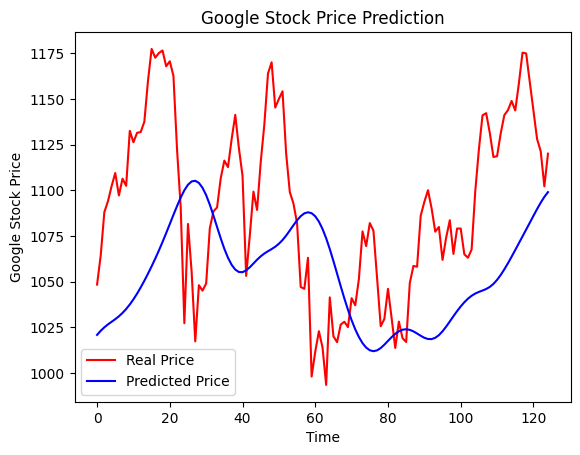

In [37]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

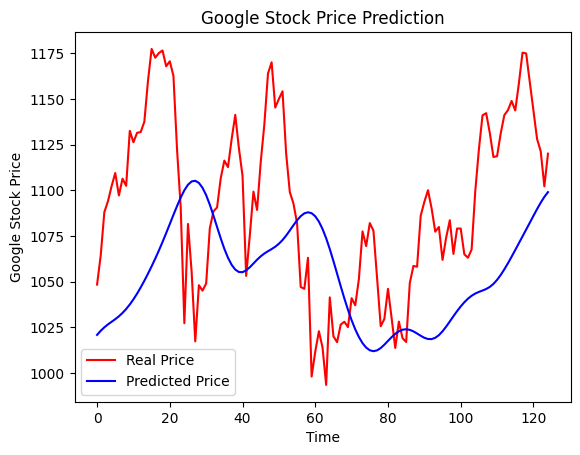

In [38]:
#old
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()